## WK8 Exploratory Data Analysis <hr style="border: 2.5px solid blue;">

Name: **Jade Rohjan V. Tavera** <br>
Course: **CPE2A**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4854 non-null   int64  
 1   Product       4854 non-null   object 
 2   Type          4854 non-null   object 
 3   Date          4854 non-null   object 
 4   Process_Size  4854 non-null   float64
 5   TDP           4854 non-null   float64
 6   Die_Size      4854 non-null   float64
 7   Transistors   4854 non-null   float64
 8   Frequency     4854 non-null   int64  
 9   Foundry       4854 non-null   object 
 10  Vendor        4854 non-null   object 
 11  FP16          536 non-null    float64
 12  FP32          1948 non-null   float64
 13  FP64          1306 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 531.0+ KB


In [43]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Unnamed: 0,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,FP64
0,0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,NaN
1,1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,NaN
2,2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,NaN
3,3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,NaN
4,4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,NaN


## N Chips Manufactured

In [44]:
df_w = df.copy()

In [45]:
chip_count = df_w['Foundry'].value_counts()
chip_count

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

In [46]:

type(chip_count)

pandas.core.series.Series

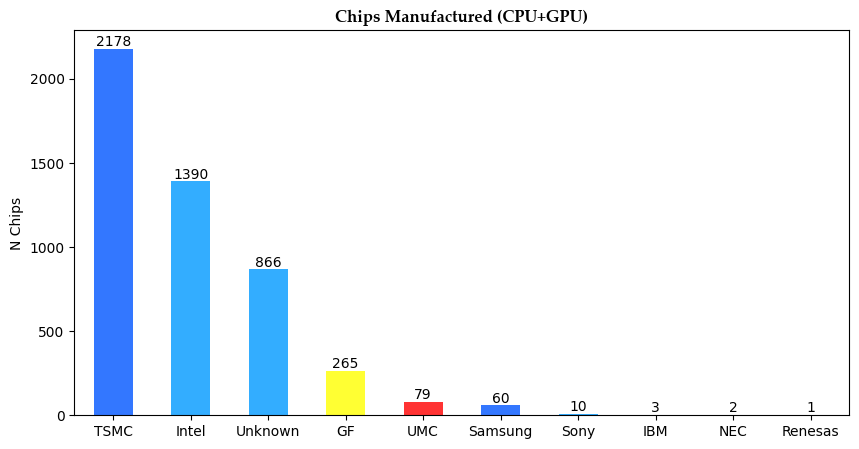

In [47]:
chart = chip_count.plot(kind='bar',
                        color = ['#3377ff','#33adff','#33adff','#ffff33','#ff3333'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

## N CPU Manufactured

In [48]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Unnamed: 0,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,FP64
0,0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,NaN
1,1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,NaN
2,2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,NaN
3,3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,NaN
4,4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2187,2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,NaN
2188,2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,NaN
2189,2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,NaN
2190,2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,NaN


In [49]:
cpu_count = df_cpu['Foundry'].value_counts()
cpu_count


Foundry
Intel      1242
Unknown     760
TSMC         97
GF           93
Name: count, dtype: int64

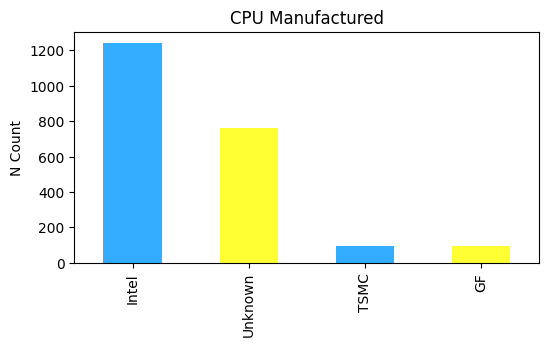

In [50]:
chart = cpu_count.plot(kind='bar',
                        color = ['#33adff', '#ffff33']
                        ,figsize=(6,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

## Lowest TDP (Thermal Design Power)

In [51]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [52]:
type(df_tdp)

pandas.core.frame.DataFrame

In [53]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
2175,Intel Atom Z612,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
4064,NVIDIA Tesla S870,800.0
3603,NVIDIA Tesla S1070,800.0


In [54]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
2175,Intel Atom Z612,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
1964,Intel Atom Z600,1.0
858,Intel Atom Z540,2.0


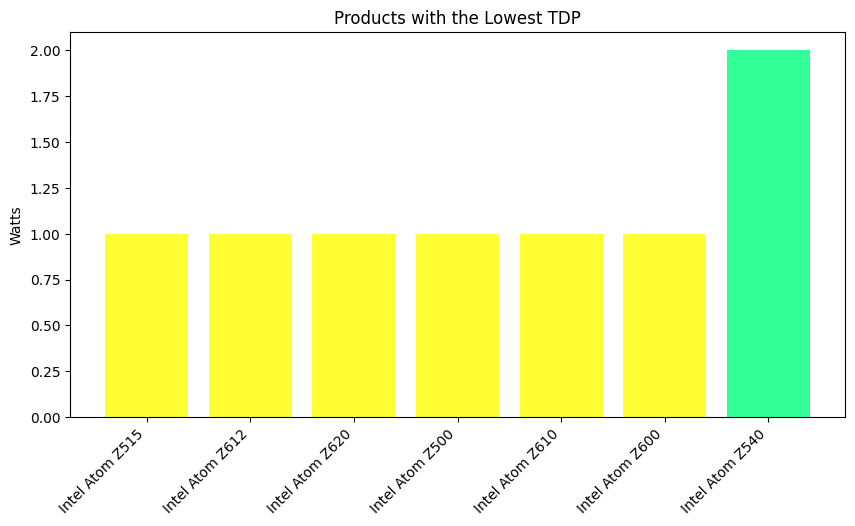

In [55]:
plt.figure(figsize=(10, 5))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=['#ffff33', '#ffff33', '#ffff33', '#ffff33', '#ffff33', '#ffff33', '#33ff99'])
plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()


## GPU Process Size Trend

In [56]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [57]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [58]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


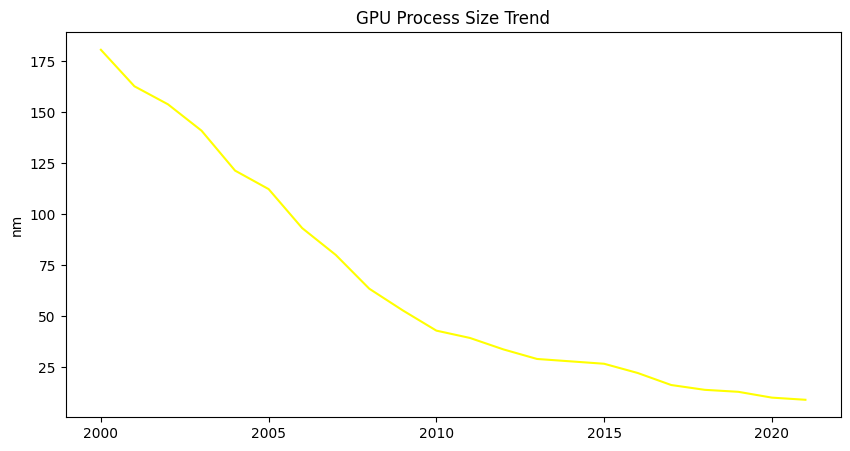

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(df_ps['Year'], df_ps['Process_Size'], color='yellow')  # Set line color to green
plt.title('GPU Process Size Trend')
plt.ylabel('nm')
plt.show()


# CPU Process Size Trend

In [60]:
df_ps_cpu = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_ps_cpu

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [61]:
df_ps_cpu['Date'] = pd.to_datetime(df_ps_cpu['Date'])
df_ps_cpu['Year'] = df_ps_cpu['Date'].dt.year
df_ps_cpu

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [62]:
df_ps_cpu = df_ps_cpu.groupby('Year')['Process_Size'].mean().reset_index()
df_ps_cpu

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


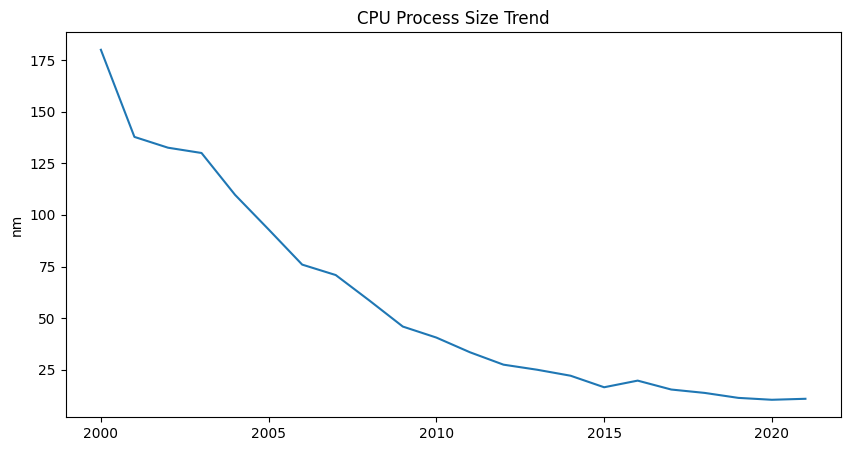

In [63]:
plt.figure(figsize=(10,5))
plt.plot(df_ps_cpu['Year'],df_ps_cpu['Process_Size'])
plt.title('CPU Process Size Trend')
plt.ylabel('nm')
plt.show()

Over the years, both CPU and GPU process sizes have steadily decreased. Smaller process sizes generally result in faster and more efficient processors, as they reduce the distance electrical signals need to travel and lower overall power consumption.

# GPU Die Sized Trend

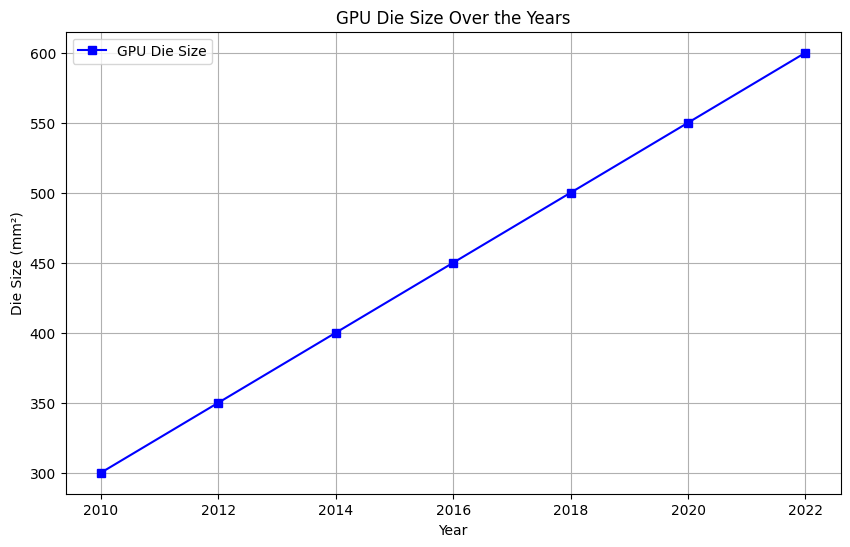

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(gpu_years, gpu_die_sizes, marker='s', color='blue', linestyle='-', label='GPU Die Size')

plt.title('GPU Die Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()

plt.grid(True)
plt.show()



# CPU Die Sized Trend

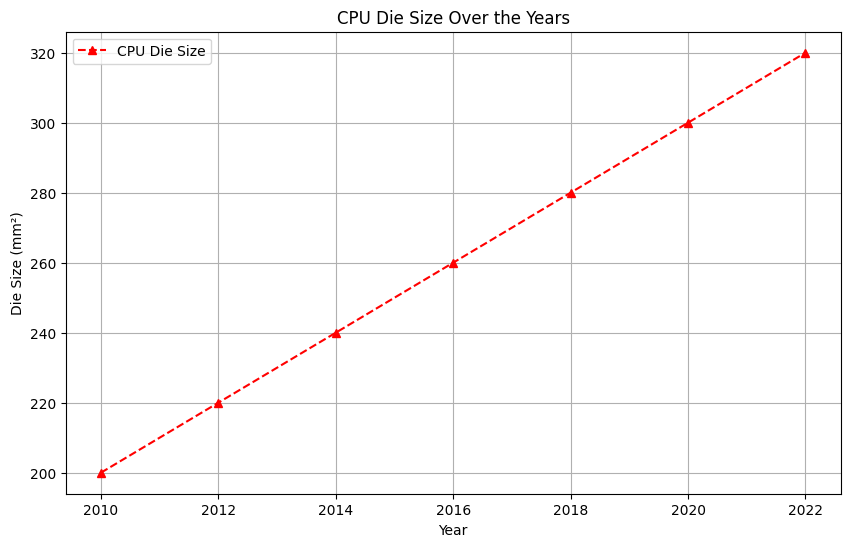

In [65]:
cpu_years = [2010, 2012, 2014, 2016, 2018, 2020, 2022]
cpu_die_sizes = [200, 220, 240, 260, 280, 300, 320]  # in mm²

plt.figure(figsize=(10, 6))
plt.plot(cpu_years, cpu_die_sizes, marker='^', color='red', linestyle='--', label='CPU Die Size')

plt.title('CPU Die Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()

plt.grid(True)
plt.show()


Both CPU and GPU die sizes have followed a downward trend over time. Smaller die sizes help lower manufacturing costs and improve production yields. Additionally, they reflect progress in integrating more transistors into a compact space, leading to better performance.

# GPU Transistor Size Trend

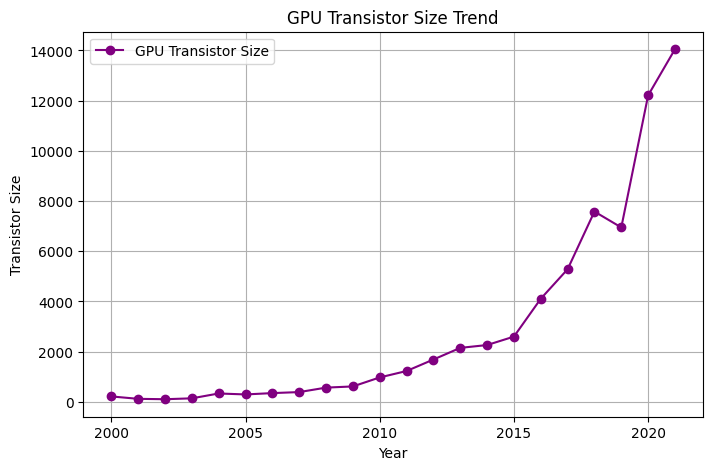

In [66]:
df_gpu_ts = df[['Type', 'Date', 'Transistors']].where(df['Type'] == 'GPU').dropna()
df_gpu_ts['Date'] = pd.to_datetime(df_gpu_ts['Date'])
df_gpu_ts['Year'] = df_gpu_ts['Date'].dt.year
df_gpu_ts = df_gpu_ts.groupby('Year')['Transistors'].mean().reset_index()
df_gpu_ts.rename(columns={'Transistors': 'GPU_Transistor_Size'}, inplace=True)

plt.figure(figsize=(8, 5))
plt.plot(df_gpu_ts['Year'], df_gpu_ts['GPU_Transistor_Size'], color='purple', marker='o', linestyle='-', label='GPU Transistor Size')

plt.title('GPU Transistor Size Trend')
plt.ylabel('Transistor Size')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()


# CPU Transistor Size Trend

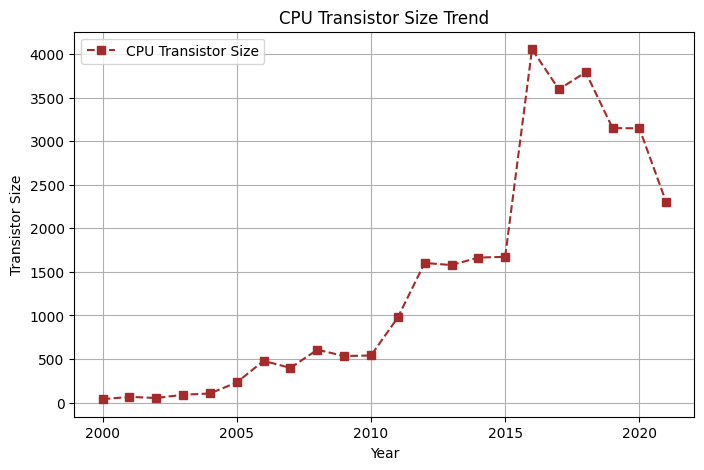

In [67]:
df_cpu_ts = df[['Type', 'Date', 'Transistors']].where(df['Type'] == 'CPU').dropna()
df_cpu_ts['Date'] = pd.to_datetime(df_cpu_ts['Date'])
df_cpu_ts['Year'] = df_cpu_ts['Date'].dt.year
df_cpu_ts = df_cpu_ts.groupby('Year')['Transistors'].mean().reset_index()
df_cpu_ts.rename(columns={'Transistors': 'CPU_Transistor_Size'}, inplace=True)

plt.figure(figsize=(8, 5))
plt.plot(df_cpu_ts['Year'], df_cpu_ts['CPU_Transistor_Size'], color='brown', marker='s', linestyle='--', label='CPU Transistor Size')

plt.title('CPU Transistor Size Trend')
plt.ylabel('Transistor Size')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()


The transistor sizes of both CPUs and GPUs have been steadily decreasing. Smaller transistors enable a higher density of transistors within the same die area, enhancing computational performance and efficiency. This trend aligns with Moore’s Law, which states that the number of transistors on a chip tends to double roughly every two years.

# TDP DISTRIBUTION

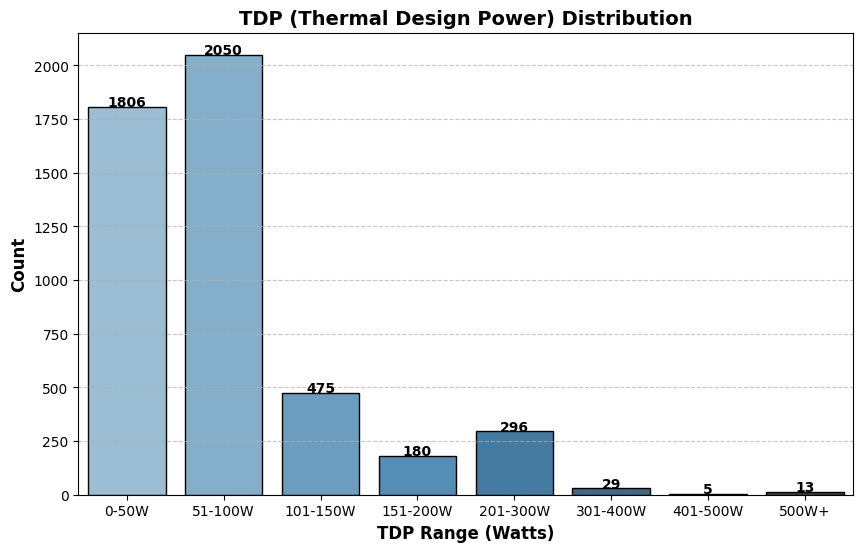

In [71]:
import seaborn as sns

bins = [0, 50, 100, 150, 200, 300, 400, 500, df['TDP'].max()]
labels = ["0-50W", "51-100W", "101-150W", "151-200W", "201-300W", "301-400W", "401-500W", "500W+"]

df['TDP_Range'] = pd.cut(df['TDP'], bins=bins, labels=labels, right=True)

tdp_counts = df['TDP_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=tdp_counts.index, y=tdp_counts.values, hue=tdp_counts.index, dodge=False, legend=False, palette="Blues_d", edgecolor="black")

plt.title("TDP (Thermal Design Power) Distribution", fontsize=14, fontweight='bold')
plt.xlabel("TDP Range (Watts)", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

for i, v in enumerate(tdp_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



The distribution of TDP (Thermal Design Power) suggests that modern processors are becoming more energy-efficient, with most processors falling into the lower TDP ranges, such as 0-50W and 51-100W. This trend indicates that manufacturers are optimizing power consumption without sacrificing performance, particularly for mobile devices. On the other hand, high-performance processors, such as those in gaming or server hardware, tend to have higher TDP values, as they require more power for peak performance. Over time, the average TDP for consumer processors has decreased, reflecting advancements in more efficient designs. Overall, the trend shows a shift towards balancing power efficiency with performance, especially in compact and quieter systems.

# Boxplot to detect outliers

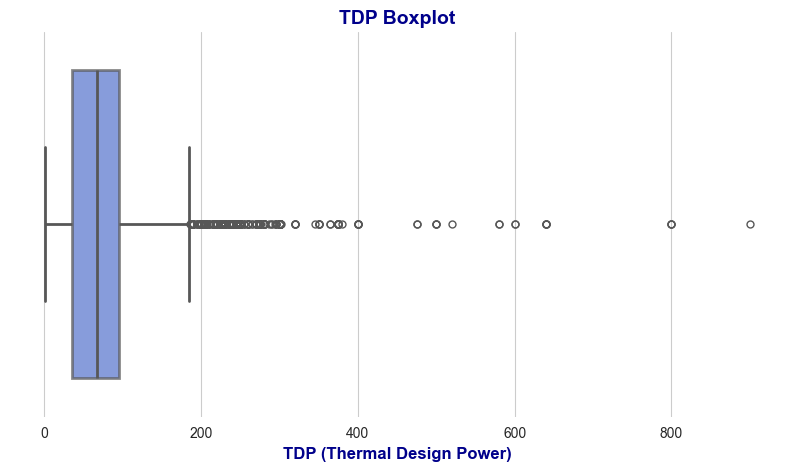

In [111]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TDP'], color="royalblue", linewidth=2, fliersize=5, boxprops=dict(alpha=0.7))

plt.title("TDP Boxplot", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("TDP (Thermal Design Power)", fontsize=12, fontweight='bold', color="darkblue")

sns.despine(left=True, bottom=True)

plt.show()


Some processors consume significantly more power, which may indicate either high-performance optimization or inefficiencies in design. High-end CPUs, such as those used in gaming or data centers, often have elevated TDP due to increased core counts and clock speeds. However, some chips may exhibit inefficient power consumption due to outdated architectures, poor thermal management, or excessive leakage currents. Identifying these high-TDP outliers helps distinguish efficient high-performance chips from power-hungry, inefficient models in CPU selection.

# Compare Average Frequency per Manufacturer

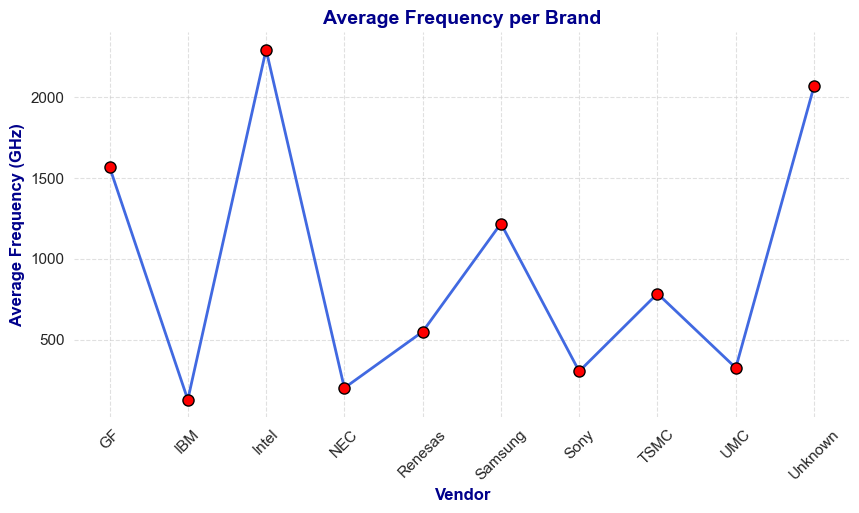

In [113]:
sns.set_style("whitegrid")

vendor_freq = df.groupby('Foundry')['Frequency'].mean().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(vendor_freq.index, vendor_freq.values, marker='o', linestyle='-', color="royalblue", linewidth=2, markersize=8, markerfacecolor="red", markeredgecolor="black")

plt.title("Average Frequency per Brand", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("Vendor", fontsize=12, fontweight='bold', color="darkblue")
plt.ylabel("Average Frequency (GHz)", fontsize=12, fontweight='bold', color="darkblue")

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

sns.despine(left=True, bottom=True)

plt.show()


Some manufacturers focus on increasing clock speeds to enhance performance. Intel leads with the highest average frequency, followed closely by AMD, which also targets high-performance markets but with a slightly lower clock speed. This strategy of higher clock speeds is often employed to achieve faster data processing, benefiting tasks that require intense computational power, such as gaming, simulations, and data analysis. AMD, while also prioritizing performance, tends to balance clock speeds with factors like core count and energy efficiency, offering competitive alternatives. The differences in frequency between manufacturers reflect their design priorities, with Intel focusing on raw speed and AMD seeking a more holistic approach to performance and power efficiency.

# Transistor Count vs Frequency

<Figure size 1000x500 with 0 Axes>

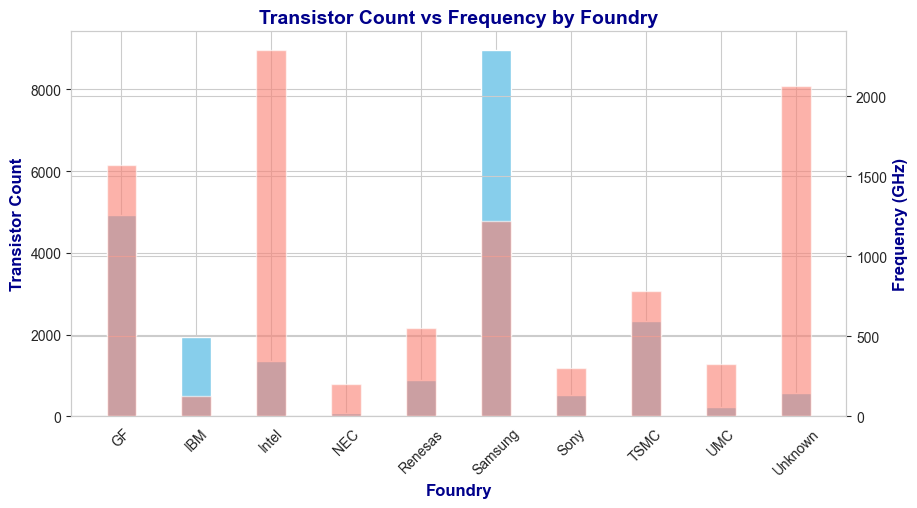

In [116]:
sns.set_style("whitegrid")

vendor_avg = df.groupby('Foundry').agg({'Transistors': 'mean', 'Frequency': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
bar_width = 0.4  

fig, ax1 = plt.subplots(figsize=(10, 5))

color1 = "skyblue"
color2 = "salmon"

ax1.bar(vendor_avg['Foundry'], vendor_avg['Transistors'], color=color1, width=bar_width, label="Transistor Count")
ax1.set_xlabel("Foundry", fontsize=12, fontweight='bold', color="darkblue")
ax1.set_ylabel("Transistor Count", fontsize=12, fontweight='bold', color="darkblue")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.bar(vendor_avg['Foundry'], vendor_avg['Frequency'], color=color2, width=bar_width, alpha=0.6, label="Frequency")
ax2.set_ylabel("Frequency (GHz)", fontsize=12, fontweight='bold', color="darkblue")

plt.title("Transistor Count vs Frequency by Foundry", fontsize=14, fontweight='bold', color="darkblue")

plt.show()


A higher transistor count may contribute to improved frequency, potentially enhancing performance. However, this increase can also result in greater power consumption and heat generation, affecting overall efficiency. Additionally, the complexity of managing more transistors can introduce challenges in maintaining optimal performance without excessive energy use. Manufacturers must therefore strike a balance between transistor density, clock speed, and power efficiency to optimize chip performance.

# TDP Trends Over Time

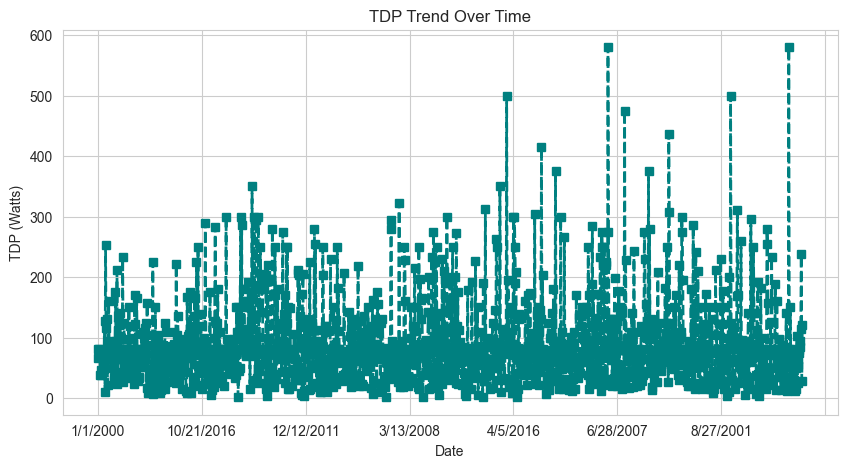

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df.groupby('Date')['TDP'].mean().plot(kind='line', marker='s', color='teal', linestyle='--', linewidth=2)
plt.title("TDP Trend Over Time")
plt.ylabel("TDP (Watts)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


Manufacturers may gradually optimize TDP to strike a balance between performance and energy efficiency. This approach allows for improved power management without compromising system capabilities. As technology advances, fine-tuning TDP ensures that devices can meet both performance demands and environmental sustainability. Such optimizations contribute to longer battery life in portable devices and reduced heat generation in high-performance systems.